In [ ]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
import os
import numpy as np
from pathlib import Path
from xml.dom.minidom import parse
from shutil import copyfile
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import glob
import imagesize
import shutil
from joblib import Parallel, delayed

In [ ]:
!pip install -qU roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="jDrMcCt9ZOCFD6g3vS8G")
project = rf.workspace("roboflow-universe-projects").project("personal-protective-equipment-combined-model")
dataset = project.version(4).download("yolov8")
# project = rf.workspace("dvp").project("construction-side-detection")
# dataset = project.version(1).download("voc")
#project = rf.workspace("northeastern-4sfxe").project("open-hole-detection-construction-safety")
#dataset = project.version(11).download("yolov8")
# project = rf.workspace("roboflow-universe-projects").project("personal-protective-equipment-combined-model")
# dataset = project.version(4).download("yolov8")
# project = rf.workspace("kfu-ye4kz").project("construction-management")
# dataset = project.version(3).download("voc")
# project = rf.workspace("latifa-sassi1").project("toeboard-scaffolding-detection_")
# dataset = project.version(7).download("voc")
# project = rf.workspace("mobilescaffold").project("mobilescaffold")
# dataset = project.version(2).download("voc")
#project = rf.workspace("david-sancho-papaseit-w3kdv").project("guaitacat")
#dataset = project.version(2).download("yolov8")
# project = rf.workspace("trent-cork").project("construction-site-object-detection")
# dataset = project.version(1).download("voc")
# project = rf.workspace("data-qcxh5").project("construction-rhhu1")
# dataset = project.version(1).download("voc")
# project = rf.workspace("aast-ni1jb").project("construction-ppes")
# dataset = project.version(6).download("yolov8")

# !wget https://scut-scet-academic.oss-cn-guangzhou.aliyuncs.com/SODA/2022.2/VOCv1.zip
# !zip -FF "/content/VOCv1.zip" --out "/content/VOCv1_Fixed.zip" -fz
# !rm -rf '/content/VOCv1.zip'
# !unzip "/content/VOCv1_Fixed.zip" -d "/tmp/Voc"
# !rm -rf '/content/VOCv1_Fixed.zip'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0


Extracting Dataset Version Zip to Personal-Protective-Equipment---Combined-Model-4 in yolov8:: 100%|██████████| 88016/88016 [00:14<00:00, 6171.49it/s]


In [ ]:
!unzip "/content/drive/MyDrive/datasets/efden_dataset.zip" -d "/content/efden"
!unzip "/content/drive/MyDrive/datasets/helmet_dataset.zip" -d "/content/helmet"
!unzip "/content/drive/MyDrive/datasets/real_dataset.zip" -d "/content/real"

In [ ]:
annotations_files = !ls '/content/efden/'
print(len(annotations_files))

740


In [ ]:
%%capture
!unzip '/content/drive/MyDrive/SODA_CUT_Dataset.zip' -d '/content/SODA'
# !unzip "/content/drive/MyDrive/datasets/efden_dataset.zip" -d "/content/efden"
# !unzip "/content/drive/MyDrive/datasets/helmet_dataset.zip" -d "/content/helmet"
# !unzip "/content/drive/MyDrive/datasets/real_dataset.zip" -d "/content/real"

In [ ]:
!mkdir NEWDS
!cd /content/NEWDS
!mkdir NEWDS/Images
!mkdir NEWDS/Annotations
!mkdir NEWDS/labels

In [ ]:
# !mv /content/Construction--side-detection-1/train/*.jpg /content/NEWDS/Images/
# !mv /content/Construction--side-detection-1/test/*.jpg /content/NEWDS/Images/
# !mv /content/Construction--side-detection-1/valid/*.jpg /content/NEWDS/Images/
# !mv /content/Construction--side-detection-1/train/*.xml /content/NEWDS/Annotations/
# !mv /content/Construction--side-detection-1/test/*.xml /content/NEWDS/Annotations/
# !mv /content/Construction--side-detection-1/valid/*.xml /content/NEWDS/Annotations/

# !mv /content/Construction-Management-3/train/*.jpg /content/NEWDS/Images/
# !mv /content/Construction-Management-3/test/*.jpg /content/NEWDS/Images/
# !mv /content/Construction-Management-3/valid/*.jpg /content/NEWDS/Images/
# !mv /content/Construction-Management-3/train/*.xml /content/NEWDS/Annotations/
# !mv /content/Construction-Management-3/test/*.xml /content/NEWDS/Annotations/
# !mv /content/Construction-Management-3/valid/*.xml /content/NEWDS/Annotations/

# !mv /content/Construction-1/train/*.jpg /content/NEWDS/Images/
# !mv /content/Construction-1/test/*.jpg /content/NEWDS/Images/
# !mv /content/Construction-1/valid/*.jpg /content/NEWDS/Images/
# !mv /content/Construction-1/train/*.xml /content/NEWDS/Annotations/
# !mv /content/Construction-1/test/*.xml /content/NEWDS/Annotations/
# !mv /content/Construction-1/valid/*.xml /content/NEWDS/Annotations/

# !mv /content/GuaitaCat-2/train/images/*.jpg /content/NEWDS/Images/
# !mv /content/GuaitaCat-2/test/images/*.jpg /content/NEWDS/Images/
# !mv /content/GuaitaCat-2/valid/images/*.jpg /content/NEWDS/Images/
# !mv /content/GuaitaCat-2/train/labels/*.txt /content/NEWDS/labels/
# !mv /content/GuaitaCat-2/test/labels/*.txt /content/NEWDS/labels/
# !mv /content/GuaitaCat-2/valid/labels/*.txt /content/NEWDS/labels/

# # !mv /content/MobileScaffold-2/train/*.jpg /content/NEWDS/Images/
# # !mv /content/MobileScaffold-2/test/*.jpg /content/NEWDS/Images/
# # !mv /content/MobileScaffold-2/valid/*.jpg /content/NEWDS/Images/
# # !mv /content/MobileScaffold-2/train/*.xml /content/NEWDS/Annotations/
# # !mv /content/MobileScaffold-2/test/*.xml /content/NEWDS/Annotations/
# # !mv /content/MobileScaffold-2/valid/*.xml /content/NEWDS/Annotations/

# !mv /content/Open-hole-Detection---Construction-Safety-11/train/*.jpg /content/NEWDS/Images/
# !mv /content/Open-hole-Detection---Construction-Safety-11/test/*.jpg /content/NEWDS/Images/
# !mv /content/Open-hole-Detection---Construction-Safety-11/valid/*.jpg /content/NEWDS/Images/
# !mv /content/Open-hole-Detection---Construction-Safety-11/train/*.xml /content/NEWDS/Annotations/
# !mv /content/Open-hole-Detection---Construction-Safety-11/test/*.xml /content/NEWDS/Annotations/
# !mv /content/Open-hole-Detection---Construction-Safety-11/valid/*.xml /content/NEWDS/Annotations/

# !mv /content/Personal-Protective/train/*.jpg /content/NEWDS/Images/
# !mv /content/Personal-Protective/test/*.jpg /content/NEWDS/Images/
# !mv /content/Personal-Protective/valid/*.jpg /content/NEWDS/Images/
# !mv /content/Personal-Protective/train/*.xml /content/NEWDS/Annotations/
# !mv /content/Personal-Protective/test/*.xml /content/NEWDS/Annotations/
# !mv /content/Personal-Protective/valid/*.xml /content/NEWDS/Annotations/

# !mv /content/toeboard-scaffolding-detection_-7/train/*.jpg /content/NEWDS/Images/
# !mv /content/toeboard-scaffolding-detection_-7/test/*.jpg /content/NEWDS/Images/
# !mv /content/toeboard-scaffolding-detection_-7/valid/*.jpg /content/NEWDS/Images/
# !mv /content/toeboard-scaffolding-detection_-7/train/*.xml /content/NEWDS/Annotations/
# !mv /content/toeboard-scaffolding-detection_-7/test/*.xml /content/NEWDS/Annotations/
# !mv /content/toeboard-scaffolding-detection_-7/valid/*.xml /content/NEWDS/Annotations/


!mv /content/SODA/tmp/9rcv8mm682-4/SODA/Images/*.jpg /content/NEWDS/Images/
!mv /content/SODA/tmp/9rcv8mm682-4/SODA/Annotations/*.xml /content/NEWDS/Annotations/

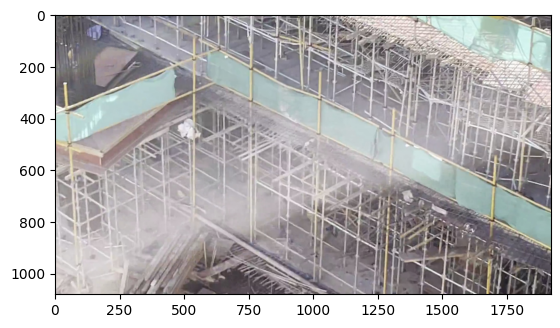

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm
path_img = '/content/NEWDS/Images/'
path_label = '/content/NEWDS/labels/'
data_img = [os.path.join(path_img,x) for x in os.listdir(path_img)]
data_lab = [os.path.join(path_label,x) for x in os.listdir(path_label)]
images = [data_img[x] for x in range(len(data_img)) if data_img[x].endswith('.jpg')]
labels = [data_lab[x] for x in range(len(data_lab)) if data_lab[x].endswith('.txt')]
plt.imshow(cv2.cvtColor(cv2.imread(images[0]),cv2.COLOR_BGR2RGB))

In [ ]:
df = pd.DataFrame(columns=['image_name','object','x_cen','y_cen','w','h'])
i = 0

label_folder = path_label # Specify the path to the label folder here

for image_path in tqdm(images):
    label_path = os.path.join(label_folder, os.path.splitext(os.path.basename(image_path))[0] + '.txt')

    with open(label_path, 'r') as label_file:
        lines = label_file.readlines()

    cleaned_lines = [line.strip() for line in lines if line.strip()]

    for line in cleaned_lines:
        label = line.split(' ')
        df.loc[i, 'image_name'] = os.path.basename(image_path)
        df.loc[i, 'object'] = int(label[0])
        df.loc[i, 'x_cen'] = float(label[1])
        df.loc[i, 'y_cen'] = float(label[2])
        df.loc[i, 'w'] = float(label[3])
        df.loc[i, 'h'] = float(label[4])
        i += 1


In [ ]:
df.head()

Empty DataFrame
Columns: [image_name, object, x_cen, y_cen, w, h]
Index: []

In [ ]:
#column name for pascal-voc dataframe
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
pascal_voc = pd.DataFrame(columns=column_name)
for i in tqdm(range(len(df))):

    pascal_voc.loc[i,'filename'] = df.loc[i,'image_name']
    pascal_voc.loc[i,'width'] = 512
    pascal_voc.loc[i,'height']= 512
    if df.loc[i,'object'] == 0:
        pascal_voc.loc[i,'class'] = 'fire'
    else:
        pascal_voc.loc[i,'class'] = 'smoke'
    pascal_voc.loc[i,'xmin']  = int((df.loc[i,'x_cen'] - df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymin']  = int((df.loc[i,'y_cen'] - df.loc[i,'h']/2)*512)
    pascal_voc.loc[i,'xmax']  = int((df.loc[i,'x_cen'] + df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymax']  = int((df.loc[i,'y_cen'] + df.loc[i,'h']/2)*512)

pascal_voc

0it [00:00, ?it/s]


Empty DataFrame
Columns: [filename, width, height, class, xmin, ymin, xmax, ymax]
Index: []

In [ ]:
import pandas as pd
from tqdm import tqdm
import os
from xml.etree.ElementTree import Element, SubElement, tostring
from xml.dom.minidom import parseString

def create_xml_annotation(image_name, objects, classes):
    root = Element('annotation')

    folder = SubElement(root, 'folder')
    folder.text = 'VOC2007'

    filename = SubElement(root, 'filename')
    filename.text = image_name

    source = SubElement(root, 'source')
    database = SubElement(source, 'database')
    database.text = 'Coco database'

    size = SubElement(root, 'size')
    width = SubElement(size, 'width')
    width.text = '0'  # Replace with the actual width of the image

    height = SubElement(size, 'height')
    height.text = '0'  # Replace with the actual height of the image

    depth = SubElement(size, 'depth')
    depth.text = '3'  # Replace with the actual number of channels in the image (e.g., 3 for RGB)

    segmented = SubElement(root, 'segmented')
    segmented.text = '0'

    for obj in objects:
        object_elem = SubElement(root, 'object')
        name = SubElement(object_elem, 'name')
        name.text = classes[obj['object']]

        pose = SubElement(object_elem, 'pose')
        pose.text = 'Unspecified'

        truncated = SubElement(object_elem, 'truncated')
        truncated.text = '0'

        difficult = SubElement(object_elem, 'difficult')
        difficult.text = '0'

        bndbox = SubElement(object_elem, 'bndbox')
        xmin = SubElement(bndbox, 'xmin')
        xmin.text = str(obj['xmin'])
        ymin = SubElement(bndbox, 'ymin')
        ymin.text = str(obj['ymin'])
        xmax = SubElement(bndbox, 'xmax')
        xmax.text = str(obj['xmax'])
        ymax = SubElement(bndbox, 'ymax')
        ymax.text = str(obj['ymax'])

    xml_str = parseString(tostring(root)).toprettyxml(indent='  ')
    return xml_str


df = pd.DataFrame(columns=['image_name','object','x_cen','y_cen','w','h'])
i = 0

label_folder = path_label  # Specify the path to the label folder here

classes = {0: 'fire', 1: 'smoke'}  # Specify your class mapping here

for image_path in tqdm(images):
    label_path = os.path.join(label_folder, os.path.splitext(os.path.basename(image_path))[0] + '.txt')

    with open(label_path, 'r') as label_file:
        lines = label_file.readlines()

    cleaned_lines = [line.strip() for line in lines if line.strip()]

    objects = []

    for line in cleaned_lines:
        label = line.split(' ')
        obj = {
            'object': int(label[0]),
            'xmin': float(label[1]),
            'ymin': float(label[2]),
            'xmax': float(label[1]) + float(label[3]),
            'ymax': float(label[2]) + float(label[4])
        }
        objects.append(obj)

    image_name = os.path.basename(image_path)
    xml_str = create_xml_annotation(image_name, objects, classes)

    # Save XML annotation file
    annotation_folder = '/content/NEWDS/Annotations/'  # Specify the path to the annotations folder here
    os.makedirs(annotation_folder, exist_ok=True)
    annotation_path = os.path.join(annotation_folder, os.path.splitext(image_name)[0] + '.xml')

    with open(annotation_path, 'w') as xml_file:
        xml_file.write(xml_str)

In [ ]:
# %%capture
# !unzip "/content/drive/MyDrive/SODA_CUT_Dataset.zip" -d "/content"
FILE_ROOT = "/content/NEWDS/"
IMAGE_PATH = FILE_ROOT + "Images"
ANNOTATIONS_PATH = FILE_ROOT + "Annotations"
source_dir = '/content/NEWDS/labels/'
target_dir = '/content/NEWDS/Images/'

In [ ]:
import xml.etree.ElementTree as ET
import glob
import os
import json
import shutil
from tqdm.notebook import tqdm
from PIL import Image
from IPython.display import HTML
from base64 import b64encode
from google.colab import output
output.enable_custom_widget_manager()

def xml_to_yolo_bbox(bbox, w, h):
    # xmin, ymin, xmax, ymax
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h
    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h
    return [x_center, y_center, width, height]

classes = []
input_dir = '/content/NEWDS/Annotations/'
image_dir = '/content/NEWDS/Images/'
output_dir = '/content/NEWDS/labels/'
# input_dir = '/tmp/Voc/VOC2007/Annotations/'
# image_dir = '/tmp/Voc/VOC2007/JPEGImages/'
# output_dir = '/tmp/Voc/VOC2007/labels/'

# 创建labels输出目录
shutil.rmtree(output_dir, ignore_errors=True)
os.mkdir(output_dir)
bbox_df1 = pd.DataFrame()
bbox_df2 = pd.DataFrame()

# 把所有xml文件处理成yolo所需要的txt文件
files = glob.glob(os.path.join(input_dir, '*.xml'))
for fil in tqdm(files):

    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]
    # check if the label contains the corresponding image file
    if not os.path.exists(os.path.join(image_dir, f'{filename}.png')):
        #print(f'{filename} image does not exist!')
        continue
    result = []
    tree = ET.parse(fil)
    root = tree.getroot()
    width = int(root.find('size').find('width').text)
    height = int(root.find('size').find('height').text)

    for obj in root.findall('object'):
        label = obj.find('name').text
        if label not in classes:
            classes.append(label)
        index = classes.index(label)
        pil_bbox = [int(x.text) for x in obj.find('bndbox')]
        yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)
        bbox_string = ' '.join([str(x) for x in yolo_bbox])
        result.append(f'{index} {bbox_string}')
    if result:
        with open(os.path.join(output_dir, f'{filename}.txt'), 'w', encoding='utf-8') as f:
            f.write('\n'.join(result))

for fil in tqdm(files):
    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]
    if not os.path.exists(os.path.join(image_dir, f'{filename}.jpg')):
        #print(f'{filename} image does not exist!')
        continue
    result = []
    tree = ET.parse(fil)
    root = tree.getroot()
    width = int(root.find('size').find('width').text)
    height = int(root.find('size').find('height').text)
    try:
      for obj in root.findall('object'):
          label = obj.find('name').text
          if label not in classes:
              classes.append(label)
          index = classes.index(label)
          pil_bbox = [int(x.text) for x in obj.find('bndbox')]
          yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)
          bbox_string = ' '.join([str(x) for x in yolo_bbox])
          result.append(f'{index} {bbox_string}')
      if result:
          with open(os.path.join(output_dir, f'{filename}.txt'), 'w', encoding='utf-8') as f:
              f.write('\n'.join(result))
    except:
      continue

  0%|          | 0/3124 [00:00<?, ?it/s]

  0%|          | 0/3124 [00:00<?, ?it/s]

In [ ]:
annotations_directory = '/content/NEWDS/Annotations/'
images_directory = '/content/NEWDS/Images/'

annotations_files = !ls '/content/NEWDS/Annotations/'
images_files = !ls '/content/NEWDS/Images/'
label_files = !ls '/content/NEWDS/labels/'

# len(annotations_files), len(images_files), len(label_files)

In [ ]:
import pathlib
import pandas as pd

in_path = pathlib.Path('/content/NEWDS/')

out_path = pathlib.Path('/content/NEWDS')

In [ ]:
import shutil
import os

target_dir = '/content/NEWDS/Images/'
target_dir_annos = '/content/NEWDS/Annotations/'

file_names = os.listdir(source_dir)
for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

In [ ]:
# Gerador que itera sobre os arquivos do diretório imagens e retorna tuplas (nome, extensão)
gerador = ((f.stem, f.suffix[1:]) for f in (in_path / 'Images').glob('*.*'))

# A primeira linha retorna um objeto pd.Series em que o índice é o nome e o valor é a extensão
# A segunda gera um dataframe em que o índice é o nome e as colunas são as diferentes extensões
# A terceira agrupa pelo nome, cada coluna indica se existe um arquivo com aquele nome e extensão
# A última move o nome do índice para uma coluna do dataframe
df = pd.DataFrame.from_records(gerador, columns=('nome', 'ext'), index='nome')['ext'] \
    .str.get_dummies() \
    .groupby(level=0).sum() \
    .reset_index()

df

nome  jpg  txt
0     hd1383    1    1
1     hd1385    1    1
2     hd1387    1    1
3     hd1444    1    1
4     hd1478    1    1
...      ...  ...  ...
3119    zl88    1    1
3120    zl90    1    1
3121    zl92    1    1
3122    zl93    1    1
3123    zl94    1    1

[3124 rows x 3 columns]

In [ ]:
df[df['jpg'] == 0]

Empty DataFrame
Columns: [nome, jpg, txt]
Index: []

In [ ]:
df[df['txt'] == 0]

nome  jpg  txt
697   hpdr3709    1    0
887    hpdr715    1    0
896   hptm1130    1    0
897   hptm1131    1    0
898   hptm1132    1    0
899   hptm1133    1    0
900   hptm1136    1    0
901   hptm1140    1    0
904   hptm1226    1    0
909   hptm1855    1    0
910   hptm1856    1    0
911   hptm1858    1    0
912   hptm1865    1    0
964   hptm2328    1    0
965   hptm2329    1    0
977   hptm2355    1    0
979   hptm2358    1    0
987   hptm2380    1    0
988   hptm2387    1    0
989   hptm2388    1    0
991   hptm2391    1    0
1339  hptm3756    1    0
1340  hptm3767    1    0
1341  hptm3778    1    0
1342  hptm3800    1    0
1396  hptm4101    1    0
1397  hptm4112    1    0
1398  hptm4123    1    0
1399  hptm4134    1    0
1400  hptm4145    1    0
1401  hptm4279    1    0
1402  hptm4312    1    0
1405  hptm4323    1    0
1406  hptm4345    1    0
1447  hptm4585    1    0
1462  hptm4751    1    0
1486  hptm4806    1    0
1496  hptm4816    1    0
1500  hptm4820    1    0
1501  hptm4821    1    0
1502  hptm4822    1    0
2067  hptm7157    1    0
2068  hptm7158    1    0
2069  hptm7159    1    0
2707     sz195    1    0
2813     yf154    1    0
2817     yf159    1    0
2939     yf602    1    0
2940     yf603    1    0
2941     yf604    1    0
2942     yf605    1    0
2944     yf613    1    0
2945     yf614    1    0
3084     zl268    1    0

In [ ]:
# # Criar txt vazios para as imagens sem txt
# for nome in df.loc[df['txt'] == 0, 'nome']:
#     (in_path / 'images' / f'{nome}.txt').touch()
df2 = df.copy()
imagens1 = df.loc[(df['txt'] == 1) & (df['jpg'] == 1), 'nome'] + '.jpg'
# imagens2 = df2.loc[(df['txt'] == 1) & (df['jpg'] == 1), 'nome'] + '.jpg'

imagens = imagens1
# .append(imagens2)
imagens

0       hd1383.jpg
1       hd1385.jpg
2       hd1387.jpg
3       hd1444.jpg
4       hd1478.jpg
           ...    
3119      zl88.jpg
3120      zl90.jpg
3121      zl92.jpg
3122      zl93.jpg
3123      zl94.jpg
Name: nome, Length: 3070, dtype: object

In [ ]:
treino = imagens.sort_values().sample(frac=0.8, random_state=42)
(f'{in_path}/Images/' + treino).to_csv(out_path / 'treino.txt', header=False, index=False)
treino

1482     hptm4802.jpg
2639     hptm9242.jpg
1685     hptm5321.jpg
194      hpdji416.jpg
240      hpdji510.jpg
            ...      
1893     hptm5978.jpg
2264     hptm8317.jpg
2736         sz24.jpg
2149     hptm8027.jpg
133     hpdji1283.jpg
Name: nome, Length: 2456, dtype: object

In [ ]:
teste = imagens.drop(treino.index)
(f'{in_path}/Images/' + teste).to_csv(out_path / 'teste.txt', header=False, index=False)
teste

1       hd1385.jpg
4       hd1478.jpg
11      hd1546.jpg
16      hd1638.jpg
19      hd1643.jpg
           ...    
3098     zl299.jpg
3100     zl302.jpg
3101     zl306.jpg
3104     zl315.jpg
3116      zl81.jpg
Name: nome, Length: 614, dtype: object

In [ ]:
import glob
from xml.etree import ElementTree
information = {'xmin': [], 'ymin': [], 'xmax': [], 'ymax': [], 'label': [], 'file': [], 'width': [], 'height': []}

for annotation in glob.glob(annotations_directory + '/*.xml'):
    tree = ElementTree.parse(annotation)

    for element in tree.iter():
        if 'size' in element.tag:
            for attribute in list(element):
                if 'width' in attribute.tag:
                    width = int(round(float(attribute.text)))
                if 'height' in attribute.tag:
                    height = int(round(float(attribute.text)))

        if 'object' in element.tag:
            for attribute in list(element):

                if 'name' in attribute.tag:
                    name = attribute.text
                    information['label'] += [name]
                    information['width'] += [width]
                    information['height'] += [height]
                    information['file'] += [annotation.split('/')[-1][0:-4]]

                if 'bndbox' in attribute.tag:
                    for dimension in list(attribute):
                        if 'xmin' in dimension.tag:
                            xmin = int(round(float(dimension.text)))
                            information['xmin'] += [xmin]
                        if 'ymin' in dimension.tag:
                            ymin = int(round(float(dimension.text)))
                            information['ymin'] += [ymin]
                        if 'xmax' in dimension.tag:
                            xmax = int(round(float(dimension.text)))
                            information['xmax'] += [xmax]
                        if 'ymax' in dimension.tag:
                            ymax = int(round(float(dimension.text)))
                            information['ymax'] += [ymax]

annotations_info_df = pd.DataFrame(information)
annotations_info_df

xmin  ymin  xmax  ymax     label      file  width  height
0       321   424   348   495    person  hpdr3702   1920    1080
1       515   427   546   496    person  hpdr3702   1920    1080
2      1183   579  1211   654    person  hpdr3702   1920    1080
3      1061   622  1097   701    person  hpdr3702   1920    1080
4      1525   479  1570   579    person  hpdr3702   1920    1080
...     ...   ...   ...   ...       ...       ...    ...     ...
32615   232   628   547   813      wood  hptm3994   1920    1080
32616  1599     1  1839   158  scaffold  hptm3994   1920    1080
32617   991   249  1313   521  scaffold  hptm3994   1920    1080
32618  1120   280  1424   599  scaffold  hptm3994   1920    1080
32619  1441    96  1681   248  scaffold  hptm3994   1920    1080

[32620 rows x 8 columns]

<Axes: >

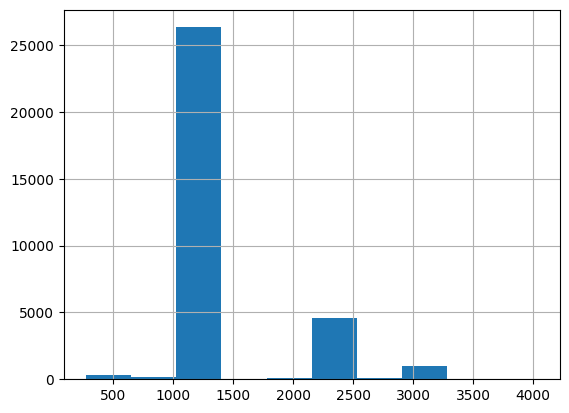

In [ ]:
annotations_info_df['height'].hist()

In [ ]:
print('IMAGE WIDTH')
print(f"Min: {min(annotations_info_df['width'])}")
print(f"Max: {max(annotations_info_df['width'])}")
print(f"Mean: {np.mean(annotations_info_df['width'])}")
print(f"Median: {np.median(annotations_info_df['width'])}")
print("IMAGE HEIGHT")
print(f"Min: {min(annotations_info_df['height'])}")
print(f"Max: {max(annotations_info_df['height'])}")
print(f"Mean: {np.mean(annotations_info_df['height'])}")
print(f"Median: {np.median(annotations_info_df['height'])}")

IMAGE WIDTH
Min: 243
Max: 4608
Mean: 2237.899509503372
Median: 1920.0
IMAGE HEIGHT
Min: 273
Max: 4032
Mean: 1293.498865726548
Median: 1080.0


In [ ]:
class_map = {
       'fire':'Fire', 'rebar':'Rebar', 'board':'Board', 'Hardhat':'Hardhat', 'Loader':'Machinary', 'Dumb_truck':'Machinary',
       'person':'Worker', 'helmet':'Hardhat', 'vest':'Vest', 'scaffold':'Scaffold', 'ebox':'Ebox', 'smoke':'Smoke',
       'Fall-Detected':'Fall-Detected', 'Mobile_crane':'Machinary', 'NO-Goggles':'Not_Wearing_Safety_Equipment', 'hook':'Hook', 'hopper':'Hopper',
       'Safety Vest':'Vest', 'Grader':'Machinary', 'Bull_dozer':'Machinary', 'Goggles':'Goggles',
       'worker_with_helmet':'Hardhat', 'handcart':'Handcart', 'Worker':'Worker', 'wood':'Wood', 'brick':'Brick',
       'mobile_scaffold_no_outtrigger':'No_Scaffold', 'NO-Gloves':'Not_Wearing_Safety_Equipment', 'Gloves':'Gloves',
       'open-hole':'Not_safe', 'mobile_scaffold_outtrigger':'Scaffold', 'Safety helmet':'Hardhat',
       'NO-Hardhat':'Not_Wearing_Safety_Equipment', 'fence':'Fence', 'slogan':'Slogan', 'Person':'Worker', 'machinery':'Machinary', 'NO-Mask':'Not_Wearing_Safety_Equipment',
       'NO-Safety Vest':'Not_Wearing_Safety_Equipment', 'vehicle':'Machinary', 'Mask':'Mask', 'worker_without_helmet':'Not_Wearing_Safety_Equipment',
       'Excavator':'Machinary', 'cutter':'Cutter', 'Safety Cone':'Safety_cone', 'toeboard':'Toeboard', 'Ladder':'Ladder',
       'Missing Guardrail':'Not_safe', 'Reflective vest':'Vest', 'Roller':'Machinary'
}

# Replace the classes in your dataframe using the class_map
annotations_info_df['label'].replace(class_map, inplace=True)


In [ ]:
annotations_info_df['label'].unique()

array(['Worker', 'Hardhat', 'Board', 'Wood', 'Scaffold', 'Vest'],
      dtype=object)

In [ ]:
# Add Annotation and Image File Names
# annotations_info_df['annotation_file'] = annotations_info_df['file'] + '.txt'
# annotations_info_df['image_file'] = annotations_info_df['file'] + '.png'

# Tidy Grammatical Issue
#annotations_info_df.loc[annotations_info_df['label'] == 'mask_weared_incorrect', 'label'] = 'mask_incorrectly_worn'


classes_df = list(annotations_info_df['label'].unique())
classes_df

with open('/content/NEWDS/classes.txt', 'w') as filehandle:
    for listitem in classes_df:
        filehandle.write('%s\n' % listitem)

with open(in_path / 'classes.txt') as f:
    classes = [line.strip() for line in f]

data = f"""
# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: {out_path}/treino.txt
val: {out_path}/teste.txt

# number of classes
nc: {len(classes)}

# class names
names: {classes}
"""

print(data)

with open(out_path / 'placas.yaml', 'w') as f:
    f.write(data)


# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: /content/NEWDS/treino.txt
val: /content/NEWDS/teste.txt

# number of classes
nc: 6

# class names
names: ['Worker', 'Hardhat', 'Board', 'Wood', 'Scaffold', 'Vest']



In [ ]:
sorted_label_df = pd.DataFrame(annotations_info_df['label'].value_counts()).reset_index()
sorted_label_df.rename(columns = {'index': 'label', 'label': 'count'}, inplace = True)
sorted_label_df

label  count
0    Worker   9760
1   Hardhat   6326
2      Vest   5712
3  Scaffold   5529
4      Wood   3351
5     Board   1942

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


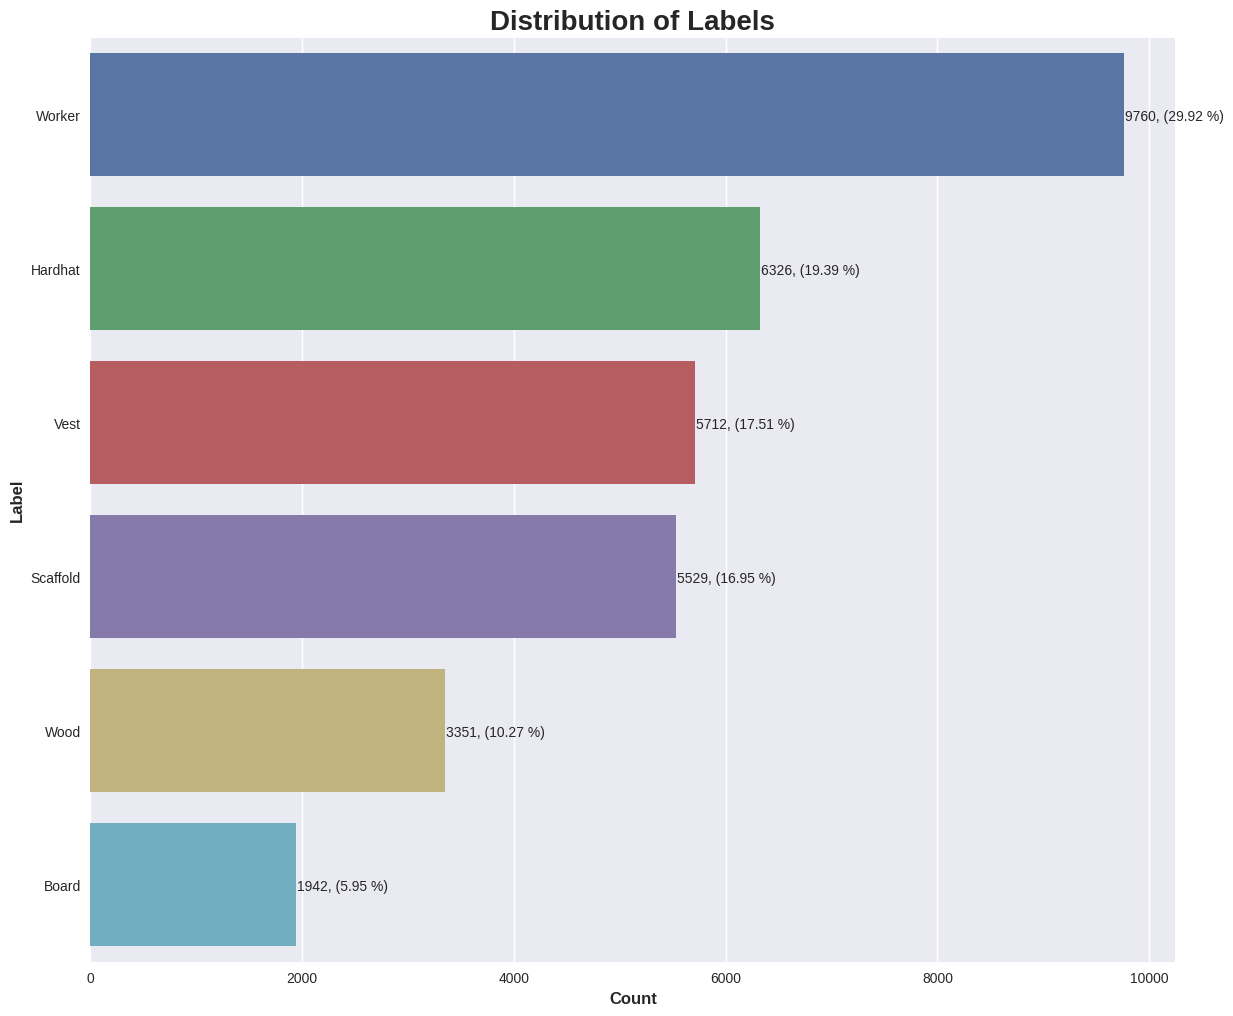

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn')
plt.figure(figsize = (14, 12))
barplot = sns.barplot(x = 'count', y = 'label', data = sorted_label_df, orient = 'horizontal')
plt.title('Distribution of Labels', fontsize = 20, fontweight = 'bold')
plt.xlabel('Count', fontsize = 12, fontweight = 'bold')
plt.ylabel('Label', fontsize = 12, fontweight = 'bold')

for p in barplot.patches:
    width = p.get_width()
    percentage = round(width * 100 / sum(sorted_label_df['count']), 2)
    plt.text(x = width +12 , y = p.get_y() + 0.55 * p.get_height(), s = f'{int(width)}, ({percentage} %)')

plt.show()

In [ ]:
!pip install -qU bbox-utility # check https://github.com/awsaf49/bbox for source code
!pip install -q imagesize
import imagesize
from bbox.utils import coco2yolo, coco2voc, voc2yolo, yolo2voc
from bbox.utils import draw_bboxes, load_image
from bbox.utils import clip_bbox, str2annot, annot2str

def get_bbox(annots):
    bboxes = [list(annot.values()) for annot in annots]
    return bboxes

def get_imgsize(row):
    row['width'], row['height'] = imagesize.get(row['image_path'])
    return row

np.random.seed(32)
colors = [(np.random.randint(255), np.random.randint(255), np.random.randint(255))\
          for idx in range(1)]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.8 MB/s eta 0:00:00


In [ ]:
def point2bbox(points):
    points = np.array(points)
    points = points.astype('int') # str -> int
    points = points.reshape(-1, 2) # shape: (None, ) -> shape: (None, 2) => (x, y) format
    xmin, ymin, xmax, ymax = points[:, 0].min(), points[:, 1].min(), points[:, 0].max(), points[:, 1].max()
    return [[xmin, ymin, xmax, ymax]]

In [ ]:
def write_to_csv(ann_path ,img_path ,dict):
    ann_path = '/content/NEWDS/Annotations/'
    imh_path = '/content/NEWDS/Images/'
    annos = []    #Kindly adjust the indentations
    # Read txts
    for files in os.walk(ann_path): #Kindly adjust the indentations
      for file in files[2]:
        print (file + "-->start!")
        # Read image and get its size attributes
        img_name = os.path.splitext(file)[0] + '.png'
        fileimgpath = os.path.join(img_path ,img_name)
        im = Image.open(fileimgpath)
        w = int(im.size[0])
        h = int(im.size[1])

        # Read txt file
        filelabel = open(os.path.join(ann_path , file), "r")
        lines = filelabel.read().split('\n')
        obj = lines[:len(lines)-1]
        # name = dict[obj[0]]
        for i in range(0, int(len(obj))):
             objbud=obj[i].split(' ')
             name = dict[objbud[0]]
             # print(name)
             x1 = float(objbud[1])
             y1 = float(objbud[2])
             w1 = float(objbud[3])
             h1 = float(objbud[4])
             xmin = int((x1*w) - (w1*w)/2.0)
             ymin = int((y1*h) - (h1*h)/2.0)
             xmax = int((x1*w) + (w1*w)/2.0)
             ymax = int((y1*h) + (h1*h)/2.0)
             annos.append([img_name ,w ,h ,name ,xmin ,ymin ,xmax ,ymax])
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax' ]
    df = pd.DataFrame(annos, columns=column_name)
    print(annos[:10])
    return df

df

nome  jpg  txt
0     hd1383    1    1
1     hd1385    1    1
2     hd1387    1    1
3     hd1444    1    1
4     hd1478    1    1
...      ...  ...  ...
3119    zl88    1    1
3120    zl90    1    1
3121    zl92    1    1
3122    zl93    1    1
3123    zl94    1    1

[3124 rows x 3 columns]

In [ ]:
import random
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # Denormalize the coordinates.
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)

        thickness = max(2, int(w/275))

        cv2.rectangle(
            image,
            (xmin, ymin), (xmax, ymax),
            color=(0, 0, 255),
            thickness=thickness
        )
    return image

# Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))
    all_images.extend(glob.glob(image_paths+'/*.png'))
    all_images.extend(glob.glob(image_paths+'/*.PNG'))

    all_labels = glob.glob(label_paths)

    all_images.sort()
    all_labels.sort()

    num_images = len(all_images)

    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image = cv2.imread(all_images[j])
        with open(all_labels[j], 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()

In [ ]:
sorted_label_df = pd.DataFrame(annotations_info_df['label'].value_counts()).reset_index()
sorted_label_df.rename(columns = {'index': 'label', 'label': 'count'}, inplace = True)
sorted_label_df

label  count
0    Worker   9760
1   Hardhat   6326
2      Vest   5712
3  Scaffold   5529
4      Wood   3351
5     Board   1942

In [ ]:
import glob
from xml.etree import ElementTree
information = {'xmin': [], 'ymin': [], 'xmax': [], 'ymax': [], 'label': [], 'file': [], 'width': [], 'height': []}

for annotation in glob.glob(annotations_directory + '/*.xml'):
    tree = ElementTree.parse(annotation)

    for element in tree.iter():
        if 'size' in element.tag:
            for attribute in list(element):
                if 'width' in attribute.tag:
                    width = int(round(float(attribute.text)))
                if 'height' in attribute.tag:
                    height = int(round(float(attribute.text)))

        if 'object' in element.tag:
            for attribute in list(element):

                if 'name' in attribute.tag:
                    name = attribute.text
                    information['label'] += [name]
                    information['width'] += [width]
                    information['height'] += [height]
                    information['file'] += [annotation.split('/')[-1][0:-4]]

                if 'bndbox' in attribute.tag:
                    for dimension in list(attribute):
                        if 'xmin' in dimension.tag:
                            xmin = int(round(float(dimension.text)))
                            information['xmin'] += [xmin]
                        if 'ymin' in dimension.tag:
                            ymin = int(round(float(dimension.text)))
                            information['ymin'] += [ymin]
                        if 'xmax' in dimension.tag:
                            xmax = int(round(float(dimension.text)))
                            information['xmax'] += [xmax]
                        if 'ymax' in dimension.tag:
                            ymax = int(round(float(dimension.text)))
                            information['ymax'] += [ymax]

annotations_info_df = pd.DataFrame(information)
annotations_info_df.head(10)

xmin  ymin  xmax  ymax   label      file  width  height
0   321   424   348   495  person  hpdr3702   1920    1080
1   515   427   546   496  person  hpdr3702   1920    1080
2  1183   579  1211   654  person  hpdr3702   1920    1080
3  1061   622  1097   701  person  hpdr3702   1920    1080
4  1525   479  1570   579  person  hpdr3702   1920    1080
5  1215   473  1242   535  person  hpdr3702   1920    1080
6  1008   170  1027   220  person  hpdr3702   1920    1080
7   978   141   999   199  person  hpdr3702   1920    1080
8   984   128  1004   183  person  hpdr3702   1920    1080
9   966   126   984   187  person  hpdr3702   1920    1080

In [ ]:
# Add Annotation and Image File Names
annotations_info_df['annotation_file'] = annotations_info_df['file'] + '.txt'
annotations_info_df['image_file'] = annotations_info_df['file'] + '.jpg'

In [ ]:
# !pip install -qU bbox-utility # check https://github.com/awsaf49/bbox for source code
# !pip install -q imagesize
import imagesize
from bbox.utils import *


def get_bbox(annots):
    bboxes = [list(annot.values()) for annot in annots]
    return bboxes

def get_imgsize(row):
    row['width'], row['height'] = imagesize.get( target_dir + row['image_file'])
    return row

np.random.seed(32)
colors = [(np.random.randint(255), np.random.randint(255), np.random.randint(255))\
          for idx in range(1)]

def point2bbox(points):
    points = np.array(points)
    points = points.astype('int') # str -> int
    points = points.reshape(-1, 2) # shape: (None, ) -> shape: (None, 2) => (x, y) format
    xmin, ymin, xmax, ymax = points[:, 0].min(), points[:, 1].min(), points[:, 0].max(), points[:, 1].max()
    return [[xmin, ymin, xmax, ymax]]

annotations_info_df['bbox'] = annotations_info_df[["xmin", "ymin", "xmax", "ymax"]].values.tolist()
annotations_info_df['bbox'] = annotations_info_df['bbox'].map(lambda x: [x])

annotations_info_df = annotations_info_df.progress_apply(get_imgsize, axis=1)

  0%|          | 0/32620 [00:00<?, ?it/s]

In [ ]:
cnt = 0
all_bboxes = []
bboxes_info = []

annotations_info_df
for row_idx, row in tqdm(annotations_info_df.iterrows(), total=annotations_info_df.shape[0]):
    bboxes = row.bbox
    num_bbox = len(bboxes)
    ## Create Annotation(YOLO)
    target_label = images_directory + row['annotation_file']
    with open(target_label, "w") as f:
        if num_bbox < 1:
            annot = ""
            f.write(annot)
            cnt += 1
            continue
        xmin, ymin, xmax, ymax = bboxes[0]
        x = (xmin + xmax) / 2
        y = (ymin + ymax) / 2
        w = xmax - xmin
        h = ymax - ymin
        bboxes = [0, x, y, w, h]
        string = " ".join(map(str, bboxes))
        all_bboxes.append(bboxes[1:])
        bboxes_info.append([target_dir + row['image_file']])
        f.write(string)
print("Missing:", cnt)



  0%|          | 0/32620 [00:00<?, ?it/s]

Missing: 0


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=7 , random_state=42, shuffle=True)
annotations_info_df = annotations_info_df.reset_index(drop=True)
annotations_info_df['fold'] = -1
for fold, (train_idx, val_idx) in enumerate(kf.split(annotations_info_df)):
    annotations_info_df.loc[val_idx, 'fold'] = fold
annotations_info_df.fold.value_counts()


3    4660
5    4660
4    4660
1    4660
0    4660
6    4660
2    4660
Name: fold, dtype: int64

In [ ]:
bbox_df = pd.DataFrame(np.concatenate([bboxes_info, all_bboxes], axis=1),
             columns=['image_file','xmid','ymid','w','h'])
bbox_df[['xmid','ymid','w','h']] = bbox_df[['xmid','ymid','w','h']].astype(float)
bbox_df['area'] = bbox_df.w * bbox_df.h
bbox_df = bbox_df.merge(annotations_info_df[['image_file','fold']], on='image_file', how='left')
bbox_df["fold"] = annotations_info_df["fold"]

In [ ]:
from scipy.stats import gaussian_kde

all_bboxes = np.array(all_bboxes)

x_val = all_bboxes[...,0]
y_val = all_bboxes[...,1]

# # Calculate the point density
# xy = np.vstack([x_val,y_val])
# z = gaussian_kde(xy)(xy)

# fig, ax = plt.subplots(figsize = (10, 10))
# # ax.axis('off')
# ax.scatter(x_val, y_val, c=z, s=50, cmap='viridis')
# # ax.set_xlabel('x_mid')
# # ax.set_ylabel('y_mid')
# plt.show()

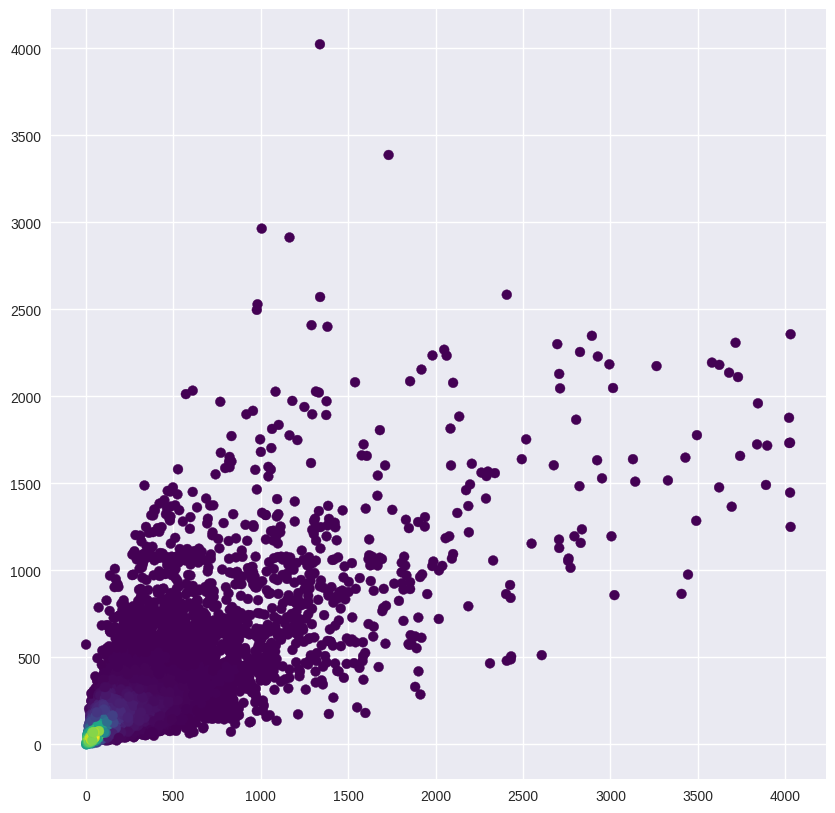

In [ ]:
x_val = all_bboxes[...,2]
y_val = all_bboxes[...,3]

# Calculate the point density
xy = np.vstack([x_val,y_val])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots(figsize = (10, 10))
# ax.axis('off')
ax.scatter(x_val, y_val, c=z, s=50, cmap='viridis')
# ax.set_xlabel('bbox_width')
# ax.set_ylabel('bbox_height')
plt.show()

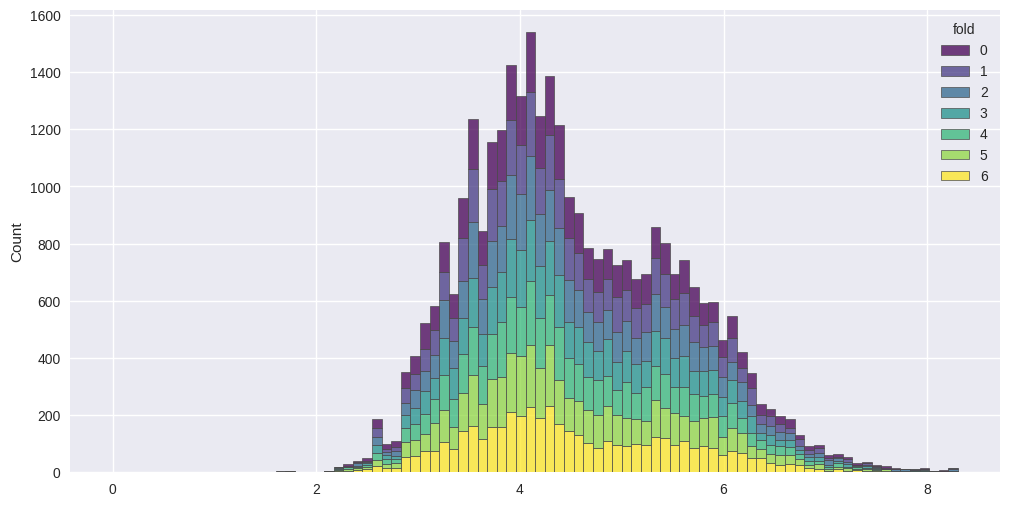

In [ ]:
import matplotlib as mpl
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 6))
sns.despine(f)

sns.histplot(
    bbox_df,
    x= np.log1p(bbox_df['w']).values, hue="fold",
    multiple="stack",
    palette="viridis",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

In [ ]:
# Git clone method (for development)
%cd /content/
!git clone https://github.com/ultralytics/ultralytics
%pip install -qe ultralytics
TF_CPP_MIN_LOG_LEVEL="2"

/content
Cloning into 'ultralytics'...
remote: Enumerating objects: 19592, done.
remote: Counting objects: 100% (746/746), done.
remote: Compressing objects: 100% (587/587), done.
remote: Total 19592 (delta 409), reused 326 (delta 158), pack-reused 18846
Receiving objects: 100% (19592/19592), 11.42 MiB | 23.68 MiB/s, done.
Resolving deltas: 100% (13534/13534), done.
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ultralytics (pyproject.toml) ... done


**6/1/2024**

In [ ]:
#my model
!yolo train model=/content/ultralytics/ultralytics/cfg/models/v8/yolov8n.yaml data=/content/Personal-Protective-Equipment---Combined-Model-4/data.yaml epochs=100 imgsz=640 optimizer=NAdam batch=32


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [ ]:
#my model
!yolo train model=/content/ultralytics/ultralytics/cfg/models/v8/yolov8n.yaml data=/content/Personal-Protective-Equipment---Combined-Model-4/data.yaml epochs=100 imgsz=640 optimizer=NAdam batch=32


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7040  ultralytics.nn.modules.block.CoT2f           [32, 32, 1, True]             
  3                  -1  1       200  ultralytics.nn.modules.block.TripletAttention[32]                          
  4                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  5                  -1  2     40448  ultralytics.nn.modules.block.CoT2f           [64, 64, 2, True]             
  6                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  7                  -1  2    154624  ultralytics.nn.modules.block.CoT2f           [128

**12-8-2023**

In [ ]:
#my model
!yolo train model=/content/ultralytics/ultralytics/cfg/models/v8/yolov8n.yaml data=/content/Personal-Protective-Equipment---Combined-Model-4/data.yaml epochs=100 imgsz=640 optimizer=NAdam batch=32


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6144  ultralytics.nn.modules.block.CoT2f           [32, 32, 1, True]             
  3                  -1  1       200  ultralytics.nn.modules.block.TripletAttention[32]                          
  4                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  5                  -1  2     38656  ultralytics.nn.modules.block.CoT2f           [64, 64, 2, True]             
  6                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  7                  -1  2    151040  ultralytics.nn.modules.block.CoT2f           [128

In [ ]:
#my model
!yolo train model=/content/ultralytics/ultralytics/cfg/models/v8/yolov8n.yaml data=/content/Personal-Protective-Equipment---Combined-Model-4/data.yaml epochs=100 imgsz=640 optimizer=NAdam batch=29


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7040  ultralytics.nn.modules.block.CoT2f           [32, 32, 1, True]             
  3                  -1  1       200  ultralytics.nn.modules.block.TripletAttention[32]                          
  4                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  5                  -1  2     40448  ultralytics.nn.modules.block.CoT2f           [64, 64, 2, True]             
  6                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  7                  -1  2    154624  ultralytics.nn.modules.block.CoT2f           [128

In [ ]:
#my model
!yolo train model=/content/ultralytics/ultralytics/cfg/models/v8/yolov8n.yaml data=/content/Personal-Protective-Equipment---Combined-Model-4/data.yaml epochs=100 imgsz=640 optimizer=NAdam batch=29


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7040  ultralytics.nn.modules.block.CoT2f           [32, 32, 1, True]             
  3                  -1  1       200  ultralytics.nn.modules.block.TripletAttention[32]                          
  4                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  5                  -1  2     40448  ultralytics.nn.modules.block.CoT2f           [64, 64, 2, True]             
  6                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  7                  -1  2    154624  ultralytics.nn.modules.block.CoT2f           [128

In [ ]:
# Test Yolob8
!yolo train model=/content/ultralytics/ultralytics/cfg/models/v8/yolov8n.yaml data=/content/Personal-Protective-Equipment---Combined-Model-4/data.yaml epochs=100 imgsz=640 optimizer=NAdam batch=64


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [ ]:
#my model
!yolo train model=/content/ultralytics/ultralytics/cfg/models/v8/yolov8n.yaml data=/content/Personal-Protective-Equipment---Combined-Model-4/data.yaml epochs=100 imgsz=640 optimizer=NAdam batch=-1


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6144  ultralytics.nn.modules.block.CoT2f           [32, 32, 1, True]             
  3                  -1  1       200  ultralytics.nn.modules.block.TripletAttention[32]                          
  4                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  5                  -1  2     38656  ultralytics.nn.modules.block.CoT2f           [64, 64, 2, True]             
  6                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  7                  -1  2    151040  ultralytics.nn.modules.block.CoT2f           [128

In [ ]:
#my model
!yolo train model=/content/ultralytics/ultralytics/cfg/models/v8/yolov8n.yaml data=/content/Personal-Protective-Equipment---Combined-Model-4/data.yaml epochs=100 imgsz=640 optimizer=NAdam batch=-1


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6144  ultralytics.nn.modules.block.CoT2f           [32, 32, 1, True]             
  3                  -1  1       200  ultralytics.nn.modules.block.TripletAttention[32]                          
  4                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  5                  -1  2     38656  ultralytics.nn.modules.block.CoT2f           [64, 64, 2, True]             
  6                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  7                  -1  2    151040  ultralytics.nn.modules.block.CoT2f           [128

In [ ]:
#my model
!yolo train model=/content/ultralytics/ultralytics/cfg/models/v8/yolov8n.yaml data=/content/Personal-Protective-Equipment---Combined-Model-4/data.yaml epochs=100 imgsz=640 optimizer=NAdam batch=29


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7040  ultralytics.nn.modules.block.CoT2f           [32, 32, 1, True]             
  3                  -1  1       200  ultralytics.nn.modules.block.TripletAttention[32]                          
  4                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  5                  -1  2     40448  ultralytics.nn.modules.block.CoT2f           [64, 64, 2, True]             
  6                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  7                  -1  2    154624  ultralytics.nn.modules.block.CoT2f           [128

In [ ]:
# Test Yolob8
!yolo train model=/content/best.pt data=/content/Personal-Protective-Equipment---Combined-Model-4/data.yaml epochs=55 imgsz=640 optimizer=NAdam batch=29

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/best.pt, data=/content/Personal-Protective-Equipment---Combined-Model-4/data.yaml, epochs=55, patience=50, batch=29, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=NAdam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/ultralytics/runs/detect/

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Test Yolob8
!yolo train model=/content/ultralytics/ultralytics/cfg/models/v8/yolov8n.yaml data=/content/Construction-PPEs-6/data.yaml epochs=150 imgsz=640 optimizer=NAdam batch=-1


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [ ]:
!cp /content/ultralytics/runs/detect/train4/weights/best.pt /content/drive/MyDrive/

In [ ]:
# Test Yolob8
!yolo train model=/content/ultralytics/ultralytics/cfg/models/v5/yolov5n.yaml data=/content/Construction-PPEs-6/data.yaml epochs=150 imgsz=640 optimizer=NAdam batch=-1

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Ultralytics YOLOv8.0.212 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5n.pt, data=/content/Open_hole/data.yaml, epochs=70, patience=50, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=NAdam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=F

In [ ]:
# Test Yolob3
!yolo train model=/content/ultralytics/ultralytics/cfg/models/v3/yolov3.yaml data=/content/Open_hole/data.yaml epochs=70 imgsz=640 optimizer=NAdam batch=-1


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 1]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     37056  ultralytics.nn.modules.block.Bottleneck      [64, 64]                      
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    295680  ultralytics.nn.modules.block.Bottleneck      [128, 128]                    
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  8   4724736  ultralytics.nn.modules.block.Bottleneck      [256, 256]                    
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

In [ ]:
# Test Yolob3
!yolo train model=/content/ultralytics/ultralytics/cfg/models/v6/yolov6.yaml data=/content/Open_hole/data.yaml epochs=70 imgsz=640 optimizer=NAdam batch=-1

WARNING ⚠️ no model scale passed. Assuming scale='n'.
activation: nn.ReLU()

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  2     18560  ultralytics.nn.modules.conv.Conv             [32, 32, 3, 1]                
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  4    147968  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 1]                
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  6    886272  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 1]              
  7        